## Data exploration and transformation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
print("Training Data Overview:")
print(train_data.info())

Training Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print("Test Data Overview:")
print(test_data.info())

Test Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [5]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [6]:
print(train_data['Title'].unique())
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


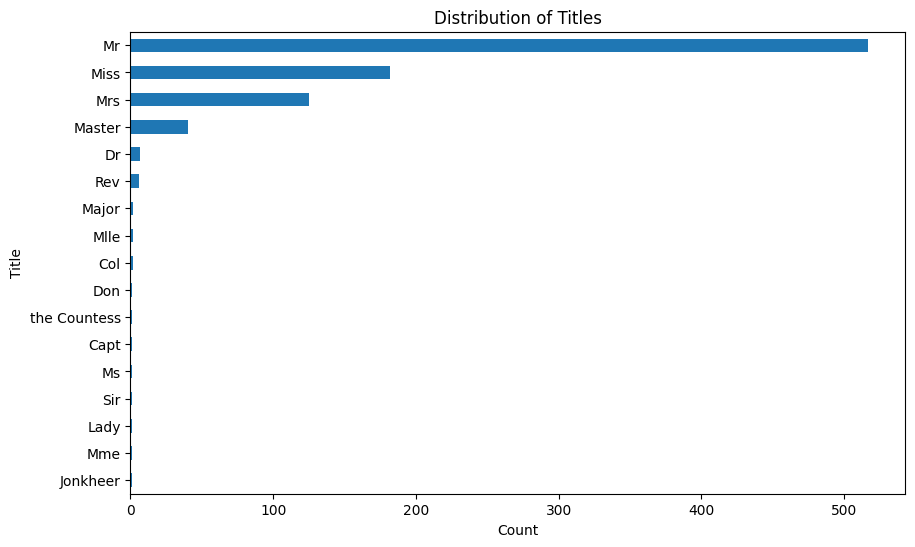

In [7]:
plt.figure(figsize=(10, 6))
train_data['Title'].value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


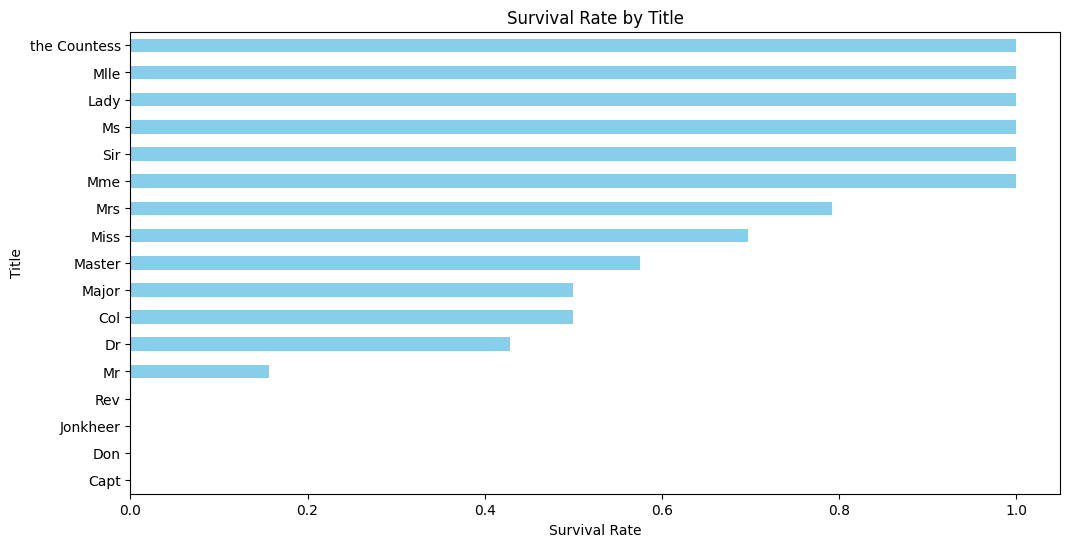

In [8]:
title_survival_rate = train_data.groupby('Title')['Survived'].mean()

print(title_survival_rate)

plt.figure(figsize=(12, 6))
title_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Title')
plt.xlabel('Survival Rate')
plt.ylabel('Title')
plt.show()

In [7]:
def get_titles(title):
    if title in ['Mme', 'Ms', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'the Countess']:
        return 'Miss'
    elif title in ['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir','Master']:
        return 'Rare'
    else:
        return title

In [9]:
train_data['Title'] = train_data['Title'].apply(get_titles)
test_data['Title'] = test_data['Title'].apply(get_titles)

NameError: name 'get_titles' is not defined

In [9]:
train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')

In [10]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [11]:
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')

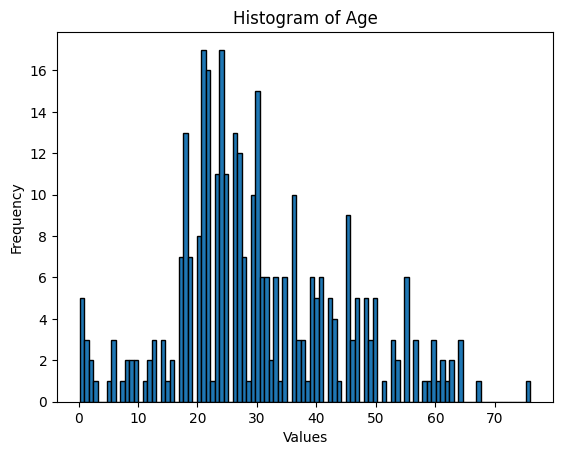

In [13]:
test_data['Age'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(col_x,key):
 sns.kdeplot(data=train_data[train_data[key] == 1], x=col_x, label='Survived', color='green', fill=True)
 sns.kdeplot(data=train_data[train_data[key] == 0], x=col_x, label='Not Survived', color='red', fill=True)

 plt.xlabel(col_x)
 plt.ylabel('Density')
 plt.title(f'Density Plot of {col_x} by {key}')
 plt.legend()

 plt.show()

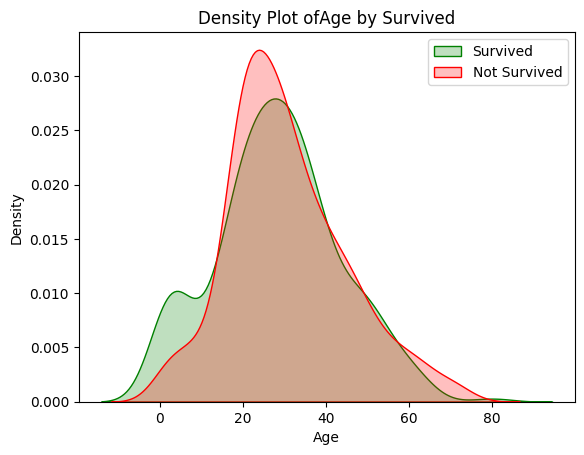

In [18]:
plot_distribution('Age','Survived')

In [12]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

29.69911764705882

In [19]:
bins_age = [0, 5, 10,15,20,25,30,35,40,50,60,70,100] 
labels_age = ['0-5','5-10','10-15','15-20','20-25', '25-30','30-35','35-40', '40-50','50-60','60-70','70-100']

In [20]:
train_data['Age_Category'] = pd.cut(train_data['Age'], bins=bins_age, labels=labels_age, right=True)
test_data['Age_Category'] = pd.cut(test_data['Age'], bins=bins_age, labels=labels_age, right=True)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch        Ticket  \
24            25         0       3  female   8.0      3      1        349909   
50            51         0       3    male   7.0      4      1       3101295   
147          148         0       3  female   9.0      2      2    W./C. 6608   
165          166         1       3    male   9.0      0      2        363291   
182          183         0       3    male   9.0      4      2        347077   
237          238         1       2  female   8.0      0      2    C.A. 31921   
278          279         0       3    male   7.0      4      1        382652   
419          420         0       3  female  10.0      0      2        345773   
480          481         0       3    male   9.0      5      2       CA 2144   
489          490         1       3    male   9.0      1      1    C.A. 37671   
535          536         1       2  female   7.0      0      2  F.C.C. 13529   
541          542         0       3  fema

In [24]:
age_survival_rate = train_data.groupby('Age_Category')['Survived'].mean()

print(age_survival_rate)


Age_Category
0-5       0.704545
5-10      0.350000
10-15     0.578947
15-20     0.343750
20-25     0.344262
25-30     0.388889
30-35     0.465909
35-40     0.417910
40-50     0.383721
50-60     0.404762
60-70     0.235294
70-100    0.200000
Name: Survived, dtype: float64


In [25]:
train_data = pd.get_dummies(train_data, columns=['Age_Category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Age_Category'], drop_first=True)

In [26]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [27]:
test_data['Fare'].dtype

dtype('float64')

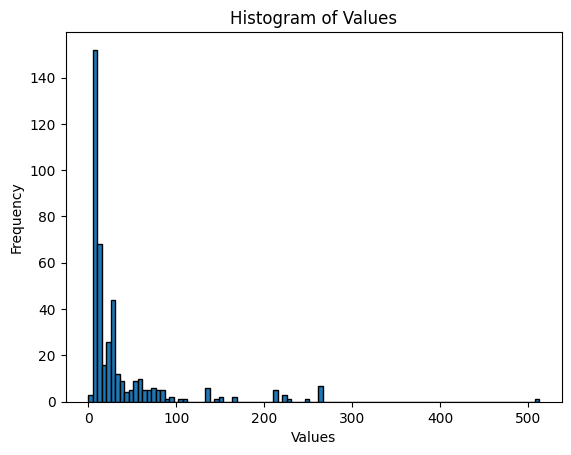

In [28]:
test_data['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [29]:
bins_fare = [0, 5,10,15, 20, 25, 30, 40, 50, 65,80, 100, 150,200,250,300, 600]
labels_fare = ['0-5', '5-10','10-15','15-20','20-25','25-30', '30-40', '40-50', '50-65','65-80','80-100','100-150', '150-200','200-250','250-300','300+']

train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)
test_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)


Fare_bin
0-5        0.062500
5-10       0.206250
10-15      0.388430
15-20      0.500000
20-25      0.404762
25-30      0.436170
30-40      0.437500
40-50      0.266667
50-65      0.651163
65-80      0.523810
80-100     0.869565
100-150    0.791667
150-200    0.666667
200-250    0.636364
250-300    0.666667
300+       1.000000
Name: Survived, dtype: float64


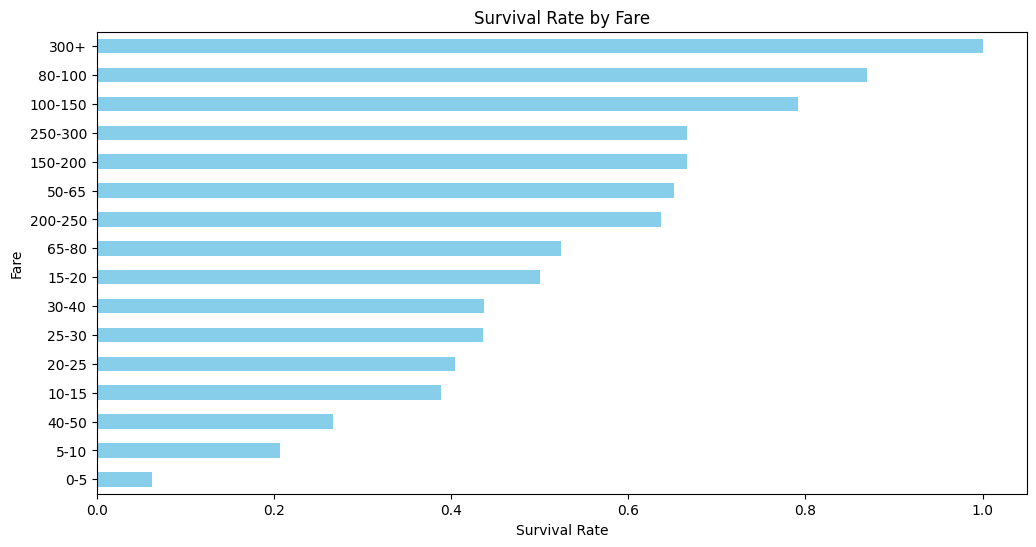

In [26]:
fare_survival_rate = train_data.groupby('Fare_bin')['Survived'].mean()

print(fare_survival_rate)

plt.figure(figsize=(12, 6))
fare_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Fare')
plt.xlabel('Survival Rate')
plt.ylabel('Fare')
plt.show()

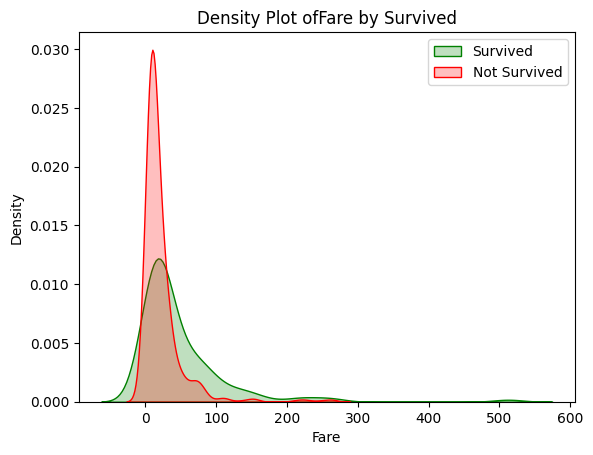

In [30]:
plot_distribution('Fare','Survived')

In [31]:
train_data = pd.get_dummies(train_data, columns=['Fare_bin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Fare_bin'], drop_first=True)

In [32]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  332 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 418 non-null    float64
 8   Cabin                91 non-null     object 
 9   Embarked             418 non-null    object 
 10  Title_Col            418 non-null    uint8  
 11  Title_Dona           418 non-null    uint8  
 12  Title_Dr             418 non-null    uint8  
 13  Title_Master         418 non-null    uint8  
 14  Title_Miss           418 non-null    uint8  
 15  Title_Mr             418 non-null    uin

In [33]:
train_data['Cabin_ind'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_data['Cabin_ind'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [34]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')  # 'M' for Missing
test_data['Deck'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')

In [35]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  332 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 418 non-null    float64
 8   Embarked             418 non-null    object 
 9   Title_Col            418 non-null    uint8  
 10  Title_Dona           418 non-null    uint8  
 11  Title_Dr             418 non-null    uint8  
 12  Title_Master         418 non-null    uint8  
 13  Title_Miss           418 non-null    uint8  
 14  Title_Mr             418 non-null    uint8  
 15  Title_Mrs            418 non-null    uin

In [36]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                            prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                           prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})

In [38]:
print(test_data['Ticket'])

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object


In [39]:
train_data['Ticket_prefix'] = train_data['Ticket'].apply(lambda x: str(x)[0:2])
test_data['Ticket_prefix'] = test_data['Ticket'].apply(lambda x: str(x)[0:2])

Ticket_prefix
11    0.568182
12    0.500000
13    0.727273
14    0.750000
16    0.800000
17    0.769231
19    0.687500
20    1.000000
21    0.000000
22    0.666667
23    0.444444
24    0.551724
25    0.500000
26    0.416667
27    0.750000
28    0.166667
29    0.642857
31    0.243243
32    0.000000
33    0.562500
34    0.143939
35    0.296296
36    0.347826
37    0.240000
38    0.200000
39    0.600000
41    0.222222
45    0.000000
54    0.000000
57    0.000000
65    0.250000
69    0.000000
72    0.000000
75    0.125000
84    0.000000
92    1.000000
A.    0.000000
A/    0.083333
A4    0.000000
C     0.400000
C.    0.464286
CA    0.071429
F.    0.666667
Fa    0.000000
LI    0.250000
P/    0.500000
PC    0.650000
PP    0.666667
S.    0.142857
SC    0.500000
SO    0.166667
ST    0.444444
SW    1.000000
W.    0.100000
W/    0.000000
WE    0.500000
Name: Survived, dtype: float64


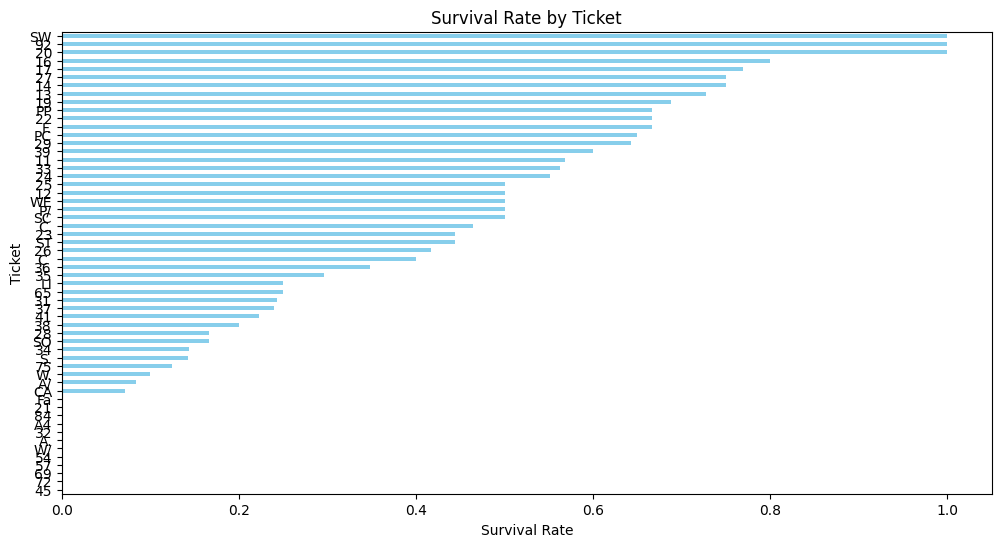

In [40]:
Ticket_prefix_survival_rate = train_data.groupby('Ticket_prefix')['Survived'].mean()

print(Ticket_prefix_survival_rate)

plt.figure(figsize=(12, 6))
Ticket_prefix_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Ticket')
plt.xlabel('Survival Rate')
plt.ylabel('Ticket')
plt.show()

In [41]:
train_data = pd.get_dummies(train_data, columns=['Ticket_prefix'], drop_first=True)

In [42]:
test_data = pd.get_dummies(test_data, columns=['Ticket_prefix'], drop_first=True)

In [43]:
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)

In [44]:
test_data = pd.get_dummies(test_data, columns=['Pclass'], drop_first=True)

In [45]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 100 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Age                  332 non-null    float64
 2   SibSp                418 non-null    int64  
 3   Parch                418 non-null    int64  
 4   Ticket               418 non-null    object 
 5   Fare                 418 non-null    float64
 6   Title_Col            418 non-null    uint8  
 7   Title_Dona           418 non-null    uint8  
 8   Title_Dr             418 non-null    uint8  
 9   Title_Master         418 non-null    uint8  
 10  Title_Miss           418 non-null    uint8  
 11  Title_Mr             418 non-null    uint8  
 12  Title_Mrs            418 non-null    uint8  
 13  Title_Ms             418 non-null    uint8  
 14  Title_Rev            418 non-null    uint8  
 15  Age_Category_5-10    418 non-null    ui

In [46]:
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

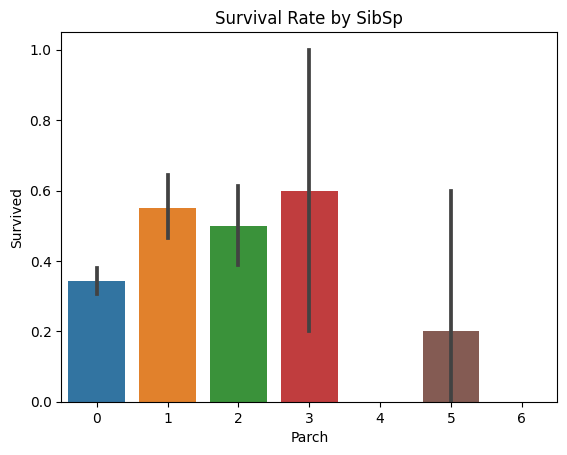

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by SibSp
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title('Survival Rate by SibSp')
plt.show()

In [48]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch']

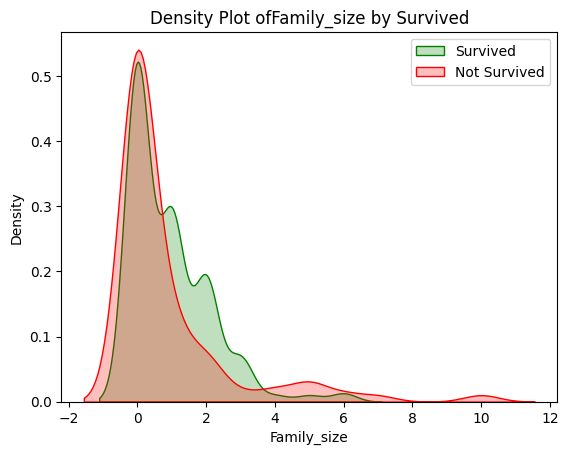

In [49]:
plot_distribution('Family_size','Survived')

In [51]:
bins_Familysize = [0,1,3,5,15]
labels_Familysize = ['solo', 'Small','Medium','Large']

train_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)
test_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)


In [38]:
train_data = pd.get_dummies(train_data, columns=['Family_size'], drop_first=True)

In [39]:
test_data = pd.get_dummies(test_data, columns=['Family_size'], drop_first=True)

In [40]:
plt.figure(figsize=(8, 6))

# Create a bar plot showing survival rates by 'Alone' status
sns.barplot(x='Alone', y='Survived', data=train_data, palette='viridis')

plt.title('Survival Rate by Alone Status')
plt.xlabel('Alone on Board (0 = Not Alone, 1 = Alone)')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Not Alone', 'Alone'])
plt.ylim(0, 1)  # Survival rate ranges from 0 to 1

plt.show()

ValueError: Could not interpret input 'Alone'

<Figure size 800x600 with 0 Axes>

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 97 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Age                  418 non-null    float64
 2   SibSp                418 non-null    int64  
 3   Parch                418 non-null    int64  
 4   Fare                 418 non-null    float64
 5   Title_Col            418 non-null    uint8  
 6   Title_Dona           418 non-null    uint8  
 7   Title_Dr             418 non-null    uint8  
 8   Title_Master         418 non-null    uint8  
 9   Title_Miss           418 non-null    uint8  
 10  Title_Mr             418 non-null    uint8  
 11  Title_Mrs            418 non-null    uint8  
 12  Title_Ms             418 non-null    uint8  
 13  Title_Rev            418 non-null    uint8  
 14  Age_Category_6-12    418 non-null    uint8  
 15  Age_Category_12-18   418 non-null    uin

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
train_data[['Fare', 'Age']] = scaler.fit_transform(train_data[['Fare', 'Age']])
test_data[['Fare', 'Age']] = scaler.transform(test_data[['Fare', 'Age']])

In [43]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)

In [44]:
y_train = train_data['Survived']

In [45]:
X_test = test_data.drop(['PassengerId'], axis=1)

In [46]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

In [47]:
missing_cols_test = train_columns - test_columns

In [48]:
missing_cols_test

{'Deck_T',
 'Ticket_prefix_14',
 'Ticket_prefix_27',
 'Ticket_prefix_45',
 'Ticket_prefix_54',
 'Ticket_prefix_57',
 'Ticket_prefix_84',
 'Ticket_prefix_A4',
 'Ticket_prefix_Fa',
 'Ticket_prefix_LI',
 'Ticket_prefix_P/',
 'Ticket_prefix_SW',
 'Ticket_prefix_W/',
 'Ticket_prefix_WE',
 'Title_Capt',
 'Title_Don',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Sir',
 'Title_the Countess'}

In [49]:
for col in missing_cols_test:
    X_test[col] = 0

In [50]:
X_test = X_test[X_train.columns]

In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 114 entries, Age to Family_size_10
dtypes: float64(2), int64(26), uint8(86)
memory usage: 126.7 KB


In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 114 entries, Age to Family_size_10
dtypes: float64(2), int64(3), uint8(109)
memory usage: 129.8 KB


## Construct Decision Trees

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [54]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [55]:
param_grid = {
    'n_estimators': [ 50, 75, 100, 200],
    'max_depth': [ 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [56]:

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=102), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           scoring='accuracy')

grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)

results = grid_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

KeyboardInterrupt: 

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

randomized_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=102),
    param_distributions=param_grid,
    n_iter=300,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=44
)

randomized_search.fit(X_train_split, y_train_split)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=102, ...),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.03, 0.1, 0.3],
                                        'max_depth': [6, 7, 8, 9, 10],
                                        'n_estimators': [50, 75, 100, 200],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=44, scoring='accuracy')

In [60]:

results = randomized_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

     mean_test_score  std_test_score  \
39          0.842687        0.024237   
297         0.839860        0.022106   
9           0.838471        0.007893   
253         0.838462        0.022357   
230         0.837083        0.020482   
..               ...             ...   
273         0.793549        0.008182   
72          0.793549        0.008182   
150         0.793519        0.013346   
213         0.792160        0.011802   
190         0.792111        0.010018   

                                                params  rank_test_score  
39   {'subsample': 0.9, 'n_estimators': 100, 'max_d...                1  
297  {'subsample': 0.9, 'n_estimators': 50, 'max_de...                2  
9    {'subsample': 0.8, 'n_estimators': 100, 'max_d...                3  
253  {'subsample': 0.9, 'n_estimators': 50, 'max_de...                4  
230  {'subsample': 0.9, 'n_estimators': 75, 'max_de...                5  
..                                                 ...              ...  
2

In [59]:
print("Best parameters:", randomized_search.best_params_)

Best parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.03, 'colsample_bytree': 0.8}


In [61]:
final_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.03,
    colsample_bytree=0.8,
    subsample=0.9,
    random_state=44
)

In [62]:
final_model.fit(X_train_split,y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)

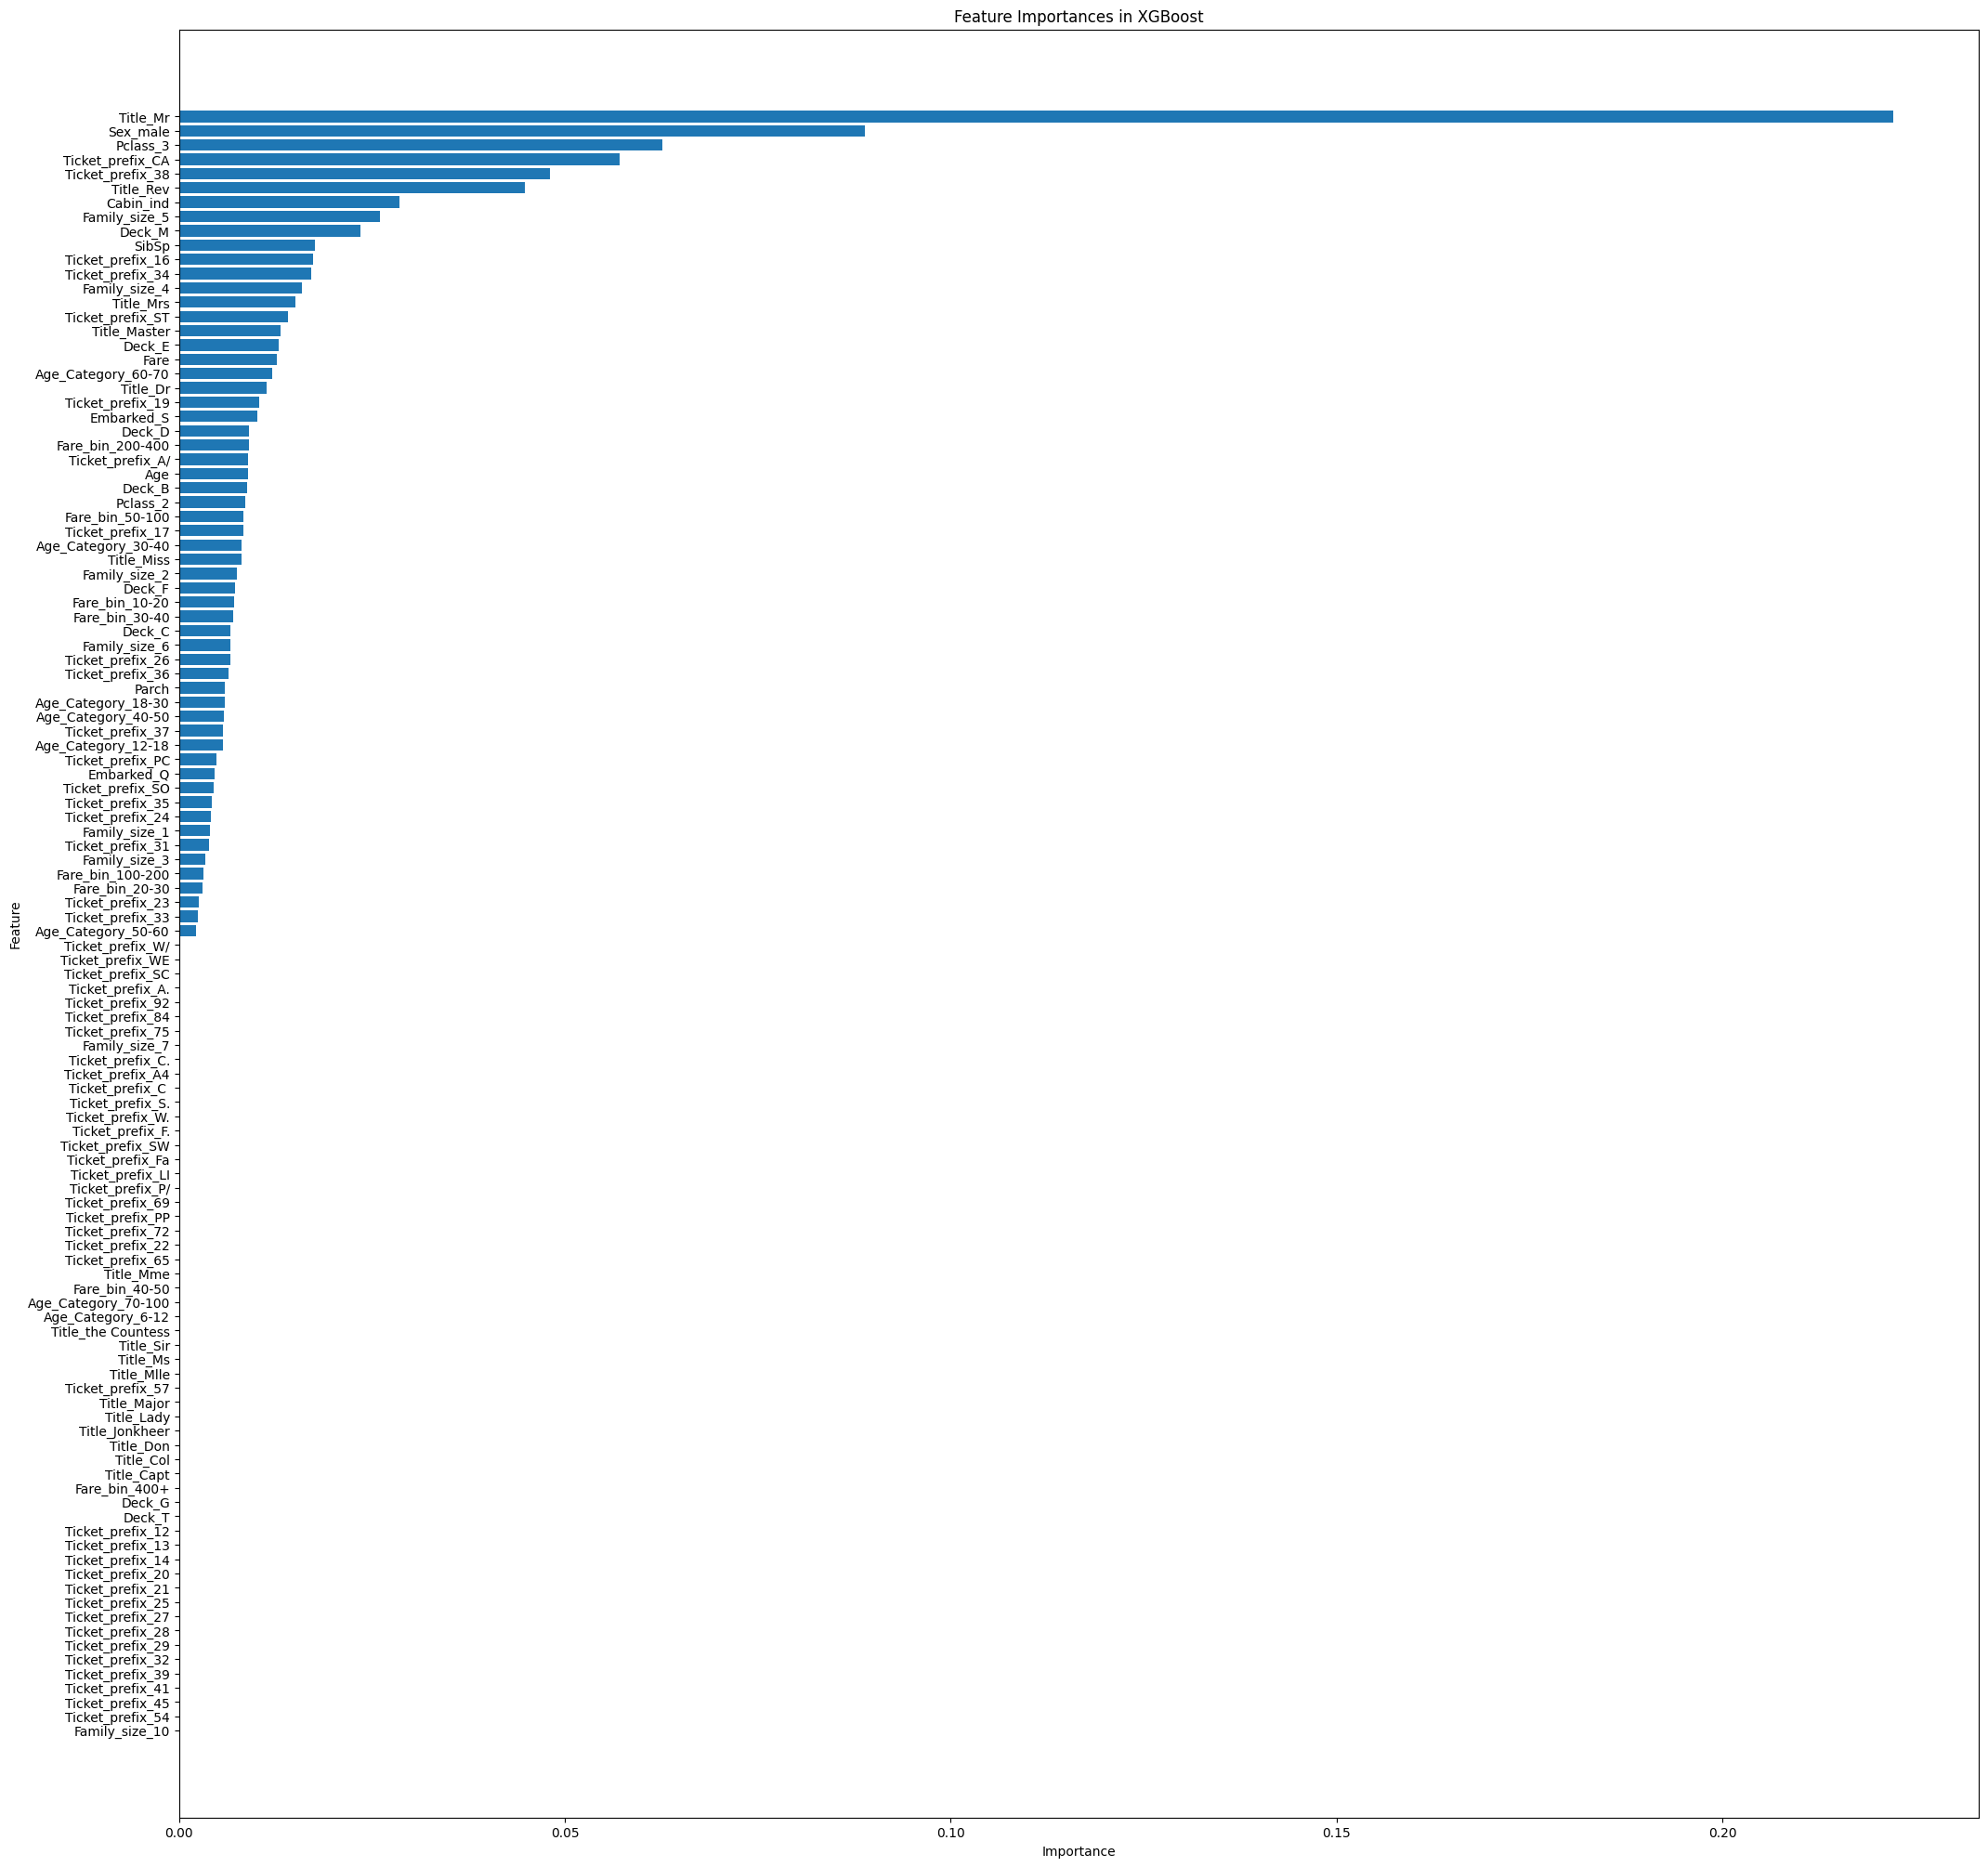

In [63]:
import matplotlib.pyplot as plt
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(25, 25))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [64]:
final_model.fit(X_train_split,y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)

In [65]:
y_pred = final_model.predict(X_val)

In [66]:
accuracy = accuracy_score(y_val, y_pred)

In [67]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:")
print(cv_scores)

# Print mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-validation Scores:
[0.83240223 0.80898876 0.88202247 0.80337079 0.85393258]
Mean Accuracy: 0.8361
Standard Deviation: 0.0291


In [68]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)

In [69]:
print(X_train.dtypes)
print(X_test.dtypes)

Age               float64
SibSp               int64
Parch               int64
Fare              float64
Title_Capt          uint8
                   ...   
Family_size_4       uint8
Family_size_5       uint8
Family_size_6       uint8
Family_size_7       uint8
Family_size_10      uint8
Length: 114, dtype: object
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Title_Capt          int64
                   ...   
Family_size_4       uint8
Family_size_5       uint8
Family_size_6       uint8
Family_size_7       uint8
Family_size_10      uint8
Length: 114, dtype: object


In [70]:
predictions = final_model.predict(X_test)

In [71]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [72]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction10.csv', index=False)

In [88]:
results_df.sort_values(by='rank_test_score').head(5)

,mean_test_score,std_test_score,params,rank_test_score
292,0.838511,0.014375,"{'subsample': 0.7, 'n_estimators': 50, 'max_de...",1
149,0.838471,0.011855,"{'subsample': 0.7, 'n_estimators': 50, 'max_de...",2
53,0.837073,0.013622,"{'subsample': 0.7, 'n_estimators': 200, 'max_d...",3
151,0.837063,0.015135,"{'subsample': 0.7, 'n_estimators': 75, 'max_de...",4
74,0.835674,0.015101,"{'subsample': 0.9, 'n_estimators': 100, 'max_d...",5


In [89]:
top_5_params =results_df.sort_values(by='rank_test_score').head(5)['params'].tolist()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

base_models = [
    (f'xgb_model_{i}', XGBClassifier(**params, random_state=102))
    for i, params in enumerate(top_5_params)
]

In [91]:
meta_model = LogisticRegression()

In [92]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train_split, y_train_split)

accuracy = stacking_model.score(X_val, y_val)

In [93]:
accuracy

0.8212290502793296

In [94]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb_model_0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=No...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.03, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=102, ...))],
                   final_estimator=LogisticRegression())

In [95]:
predictions = stacking_model.predict(X_test)

In [96]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pclass                 891 non-null    int64  
 1   Age                    891 non-null    float64
 2   SibSp                  891 non-null    int64  
 3   Parch                  891 non-null    int64  
 4   Fare                   891 non-null    float64
 5   Age_Category_Child     891 non-null    uint8  
 6   Age_Category_Teenager  891 non-null    uint8  
 7   Age_Category_Adult     891 non-null    uint8  
 8   Age_Category_Senior    891 non-null    uint8  
 9   Cabin_ind              891 non-null    int64  
 10  Sex_male               891 non-null    uint8  
 11  Embarked_Q             891 non-null    uint8  
 12  Embarked_S             891 non-null    uint8  
 13  Deck_B                 891 non-null    uint8  
 14  Deck_C                 891 non-null    uint8  
 15  Deck_D

In [121]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction2.csv', index=False)

In [171]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [30, 40, 50, 75, 100, 200],
    'max_depth': [5, 6, 7, 8, 9, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=102)

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='accuracy')

grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)

RF_results = grid_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': RF_results['mean_test_score'],
    'std_test_score': RF_results['std_test_score'],
    'params': RF_results['params'],
    'rank_test_score': RF_results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

KeyboardInterrupt: 

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=40)
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
print("Selected features:", selected_features)

Selected features: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Age_Category_12-20', 'Age_Category_20-30',
       'Age_Category_30-40', 'Age_Category_40-50', 'Fare_bin_10-20',
       'Fare_bin_20-30', 'Fare_bin_30-40', 'Fare_bin_50-100', 'Cabin_ind',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_M', 'Ticket_prefix_16', 'Ticket_prefix_19',
       'Ticket_prefix_24', 'Ticket_prefix_26', 'Ticket_prefix_31',
       'Ticket_prefix_34', 'Ticket_prefix_35', 'Ticket_prefix_36',
       'Ticket_prefix_38', 'Ticket_prefix_A/', 'Ticket_prefix_PC',
       'Ticket_prefix_ST', 'Pclass_2', 'Pclass_3', 'Alone'],
      dtype='object')


In [99]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [100]:
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=9,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=40,
    max_features='sqrt',
    random_state=102
)


In [101]:
final_model.fit(X_train_split, y_train_split)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [102]:
y_pred = final_model.predict(X_val)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy on validation set: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[93 12]
 [16 58]]


In [104]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [105]:
predictions = final_model.predict(X_test)

In [107]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction7.csv', index=False)

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.327751
std,120.810458,0.469956
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.322967
std,120.810458,0.468170
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
